<div>
  <button type="button" class="btn btn-primary btn-md" aria-controls="collase-basic-example" aria-expanded="false">
    <!---->
    Importation d'un fichier WAV
  </button>
</div>

<div class="alert alert-block alert-info">
    
- <cite><font color="orange"> Mac os </font></cite>

```python
import os
os.system("afplay vuvuzela.wav&")
```   

- <cite><font color="orange"> Linux </font></cite>

```python
import os
os.system("aplay vuvuzela.wav&")
```   
    
- <cite><font color="orange"> Windows </font></cite>

```python
import winsound 
winsound.PlaySound("vuvuzela.wav",winsound.SND_ASYNC)
```   
</div>

%%html
<a href="#" class="badge badge-primary">Primary</a>
<a href="#" class="badge badge-secondary">Secondary</a>
<a href="#" class="badge badge-success">Success</a>
<a href="#" class="badge badge-danger">Danger</a>
<a href="#" class="badge badge-warning">Warning</a>
<a href="#" class="badge badge-info">Info</a>
<a href="#" class="badge badge-light">Light</a>
<a href="#" class="badge badge-dark">Dark</a>

<button type="button" class="btn btn-primary">Primary</button>
<button type="button" class="btn btn-secondary">Secondary</button>
<button type="button" class="btn btn-success">Success</button>
<button type="button" class="btn btn-danger">Danger</button>
<button type="button" class="btn btn-warning">Warning</button>
<button type="button" class="btn btn-info">Info</button>
<button type="button" class="btn btn-light">Light</button>
<button type="button" class="btn btn-dark">Dark</button>

<button type="button" class="btn btn-link">Link</button>

In [48]:
from scipy.io.wavfile import read
(fe,y)=read("testnotes.wav")
print("Fréq échant :",fe)
print("Ampli :",y)
print("Taille y :",y.size)
print("Durée :",y.size/fe, 'secondes')

Fréq échant : 44100
Ampli : [[     0      0]
 [  1308   1308]
 [  2614   2614]
 ...
 [-32767 -32767]
 [-32767 -32767]
 [-32767 -32767]]
Taille y : 132300
Durée : 3.0 secondes


In [49]:
import os
os.system("afplay notes.wav&")

0

In [50]:
from IPython.display import Audio, display
display(Audio(y[:,0], rate=fe, autoplay=True))

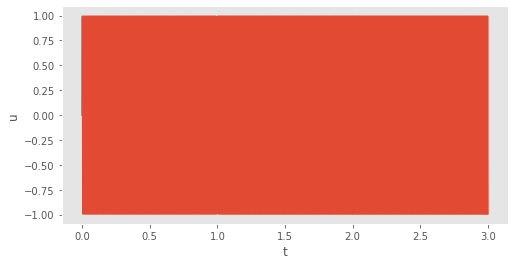

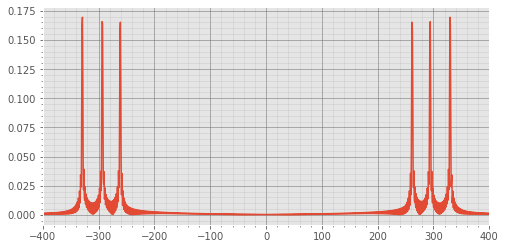

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
#%matplotlib inline
plt.style.use('ggplot')

t = np.linspace(0,3,int(y.size/2),endpoint=True)
u = y[:,0]/33000

plt.figure(figsize=(8,4))
plt.plot(t,u)
plt.xlabel('t')
plt.ylabel('u')
plt.grid()

yf = scipy.fftpack.fft(u)
yf = np.fft.fftshift(yf)
xf = np.linspace(-1.0/(2.0/fe), 1.0/(2.0/fe), yf.size)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xf, 1.0/yf.size *np.abs(yf) )
plt.xlim(-400,400)
#plt.title('FFT (spectre de puissance)')
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

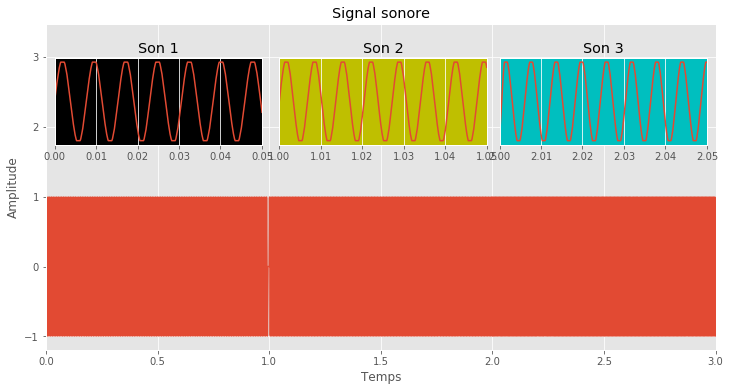

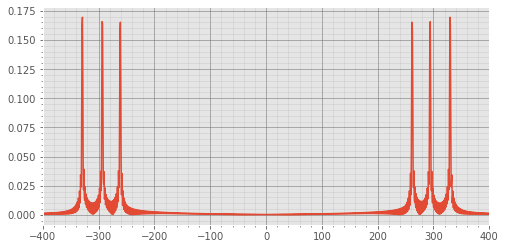

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
#%matplotlib inline
plt.style.use('ggplot')

t = np.linspace(0,3,int(y.size/2),endpoint=True)
u = y[:,0]/33000

plt.figure(figsize=(12,6))

plt.plot(t, u)
plt.axis([0, np.max(t), 1.2 * np.min(u), 3.5 * np.max(u)])
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title('Signal sonore')

a = plt.axes([0.135, 0.6, .24, .2], facecolor='k')
plt.plot(t, u)
plt.title('Son 1')
plt.xlim(0, np.max(t)/60)
plt.yticks([])

b = plt.axes([.395, .6, .24, .2], facecolor='y')
plt.plot(t, u)
plt.title('Son 2')
plt.xlim(1, 1+np.max(t)/60)
plt.yticks([])

b = plt.axes([.65, .6, .24, .2], facecolor='c')
plt.plot(t, u)
plt.title('Son 3')
plt.xlim(2, 2+np.max(t)/60)
plt.yticks([])

yf = scipy.fftpack.fft(u)
yf = np.fft.fftshift(yf)
xf = np.linspace(-1.0/(2.0/fe), 1.0/(2.0/fe), yf.size)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xf, 1.0/yf.size *np.abs(yf) )
plt.xlim(-400,400)
#plt.title('FFT (spectre de puissance)')
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

In [41]:
import numpy as np
from scipy.io import wavfile

sampleRate = 44100
frequency = 440
length = 2

t = np.linspace(0, length, sampleRate * length)
y = np.sin(frequency * 2 * np.pi * t)

wavfile.write('Son_1HzD1mn.wav', sampleRate, y)

In [46]:
from scipy.io.wavfile import read
(fe,y)=read("Son_1HzD1mn.wav")
print("Fréq échant :",fe)
print("Ampli :",y)
print("Taille y :",y.size)
print("Durée :",y.size/fe, 'secondes')

Fréq échant : 44100
Ampli : [ 0.00000000e+00  6.26490336e-02  1.25051934e-01 ... -1.25051934e-01
 -6.26490336e-02  1.25522677e-13]
Taille y : 88200
Durée : 2.0 secondes


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import (
    Audio, display, clear_output)
from ipywidgets import widgets
from functools import partial
%matplotlib inline

rate = 16000.
duration = .25
t = np.linspace(
    0., duration, int(rate * duration))

def synth(f):
    x = np.sin(f * 2. * np.pi * t)
    display(Audio(x, rate=rate, autoplay=True))

In [43]:
synth(440)

In [44]:
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 440. * 2**(np.arange(3, 3 + len(notes)) / 12.)
notes = list(zip(notes, freqs))

In [45]:
layout = widgets.Layout(
    width='30px', height='60px',
    border='1px solid black')

buttons = []
for note, f in notes:
    button = widgets.Button(
        description=note, layout=layout)

    def on_button_clicked(f, b):
        with widgets.Output():
            synth(f)

    button.on_click(partial(on_button_clicked, f))
    buttons.append(button)

widgets.Box(children=buttons)

Box(children=(Button(description='C', layout=Layout(border='1px solid black', height='60px', width='30px'), st…